# 타이타닉 데이터 로드 후 정보 확인
## 아래의 코드는 점검을 위한 코드이며, 데이터 전처리 및 그 외 코드들은 최선의 코드가 아님

## 데이터 로드

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('./titanic.csv')

print('Train 데이터 정보')
print(df.info())
df.head(3)

Train 데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

# 데이터 전처리

## 결측지 처리
- Age >>>> 평균 값으로 채우기
- Cabin >>>> N으로 채우기
- Embarked >>>> N으로 채우기

In [3]:
def fillna(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    return df


## 필요 없는 컬럼 제거
- PassengerId
- Name
- Ticket

In [4]:
def drop_features(df):
    return df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

## 범주형 데이터 처리
- Sex >>>> 숫자형 변환
- Embarked >>>> 숫자형 변환
- Cabin >>>> 첫 번째 문자만 추출 후 숫자형 변환

In [5]:
from sklearn.preprocessing import LabelEncoder

def format_features(df):
    df['Cabin'] = df['Cabin'].astype(str).str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

## 데이터 전처리 함수

In [6]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

## 데이터 분리(X, y)

In [7]:
y_titanic_df = df['Survived']
X_titanic_df = df.drop('Survived', axis=1, inplace=False)
X_titanic_df = transform_features(X_titanic_df)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_titanic_df
X_titanic_df.isnull().sum()

(712, 8) (179, 8) (712,) (179,)


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## 모델 학습
- DecisionTreeClassifier
- RandomForestClassifier
- LogisticRegression

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 모델 정의
models = {
    'DecisionTree': DecisionTreeClassifier(random_state=44),
    'RandomForest': RandomForestClassifier(random_state=44),
    'LogisticRegression' : LogisticRegression(solver='liblinear')
}

## 평가


In [9]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        results[name] = acc
        print(f'{name} 정확도: {acc:.4f}')
        print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
        print("Classification Report:\n", classification_report(y_test, pred))
    return results

# 모델 평가
results = evaluate_models(models, X_train, X_test, y_train, y_test)

DecisionTree 정확도: 0.8045
Confusion Matrix:
 [[101  17]
 [ 18  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       118
           1       0.72      0.70      0.71        61

    accuracy                           0.80       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179

RandomForest 정확도: 0.8436
Confusion Matrix:
 [[106  12]
 [ 16  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       118
           1       0.79      0.74      0.76        61

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

LogisticRegression 정확도: 0.8659
Confusion Matrix:
 [[108  10]
 [ 14  47]]
Classification Report:
               precision    recall  f1-score   support

           0

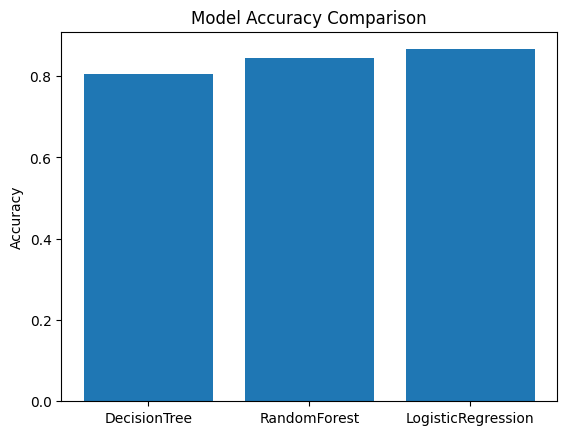

In [10]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

## 모델 학습
- K-Fold 교차 검증

In [11]:
# for 문
from sklearn.model_selection import KFold
import numpy as np

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f'교차 검증 {iter_count} 정확도: {accuracy:.4f}')
    mean_score = np.mean(scores)
    print(f'평균 정확도: {mean_score:.4f}')

exec_kfold(DecisionTreeClassifier(random_state=11))

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


## cross_val_score()

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(random_state=44), X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print(f'교차 검증: {iter_count}, 정확도: {accuracy}')
print(f'평균 정확도 >>>> {np.mean(scores):.4f}')

교차 검증: 0, 정확도: 0.7653631284916201
교차 검증: 1, 정확도: 0.7752808988764045
교차 검증: 2, 정확도: 0.797752808988764
교차 검증: 3, 정확도: 0.7808988764044944
교차 검증: 4, 정확도: 0.8258426966292135
평균 정확도 >>>> 0.7890


## 하이퍼파라미터 튜닝(알려 드릴 예정)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(DecisionTreeClassifier(random_state=44), param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

grid_dclf = DecisionTreeClassifier(random_state=44, max_depth= 3, min_samples_leaf= 5, min_samples_split= 2)

# scores = cross_val_score(grid_dclf, X_titanic_df, y_titanic_df, cv=5)

# for iter_count, accuracy in enumerate(scores):
#     print(f'교차 검증: {iter_count}, 정확도: {accuracy}')
# print(f'평균 정확도 >>>> {np.mean(scores):.4f}')

# print('----'*18)
# exec_kfold(grid_dclf)

print(f'GridSearchCV 최적 하이퍼 파라미터 >>>> {grid_dclf.best_params_}')
print(f'GridSearchCV 최고 정확도: {grid_dclf.best_score_}')

In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}

gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=44), param_grid=parameters, scoring='accuracy', cv=5)
gridsearch.fit(X_train, y_train)

tree = DecisionTreeClassifier(random_state=44, max_depth= 3, min_samples_leaf= 5, min_samples_split= 2)

scores = cross_val_score(tree, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print(f'교차 검증: {iter_count}, 정확도: {accuracy}')
print(f'평균 정확도 >>>> {np.mean(scores):.4f}')
print('----'*18)

exec_kfold(tree)
print('----'*18)
print(f'GridSearchCV 최적 하이퍼 파라미터 >>>> {gridsearch.best_params_}')
print(f'GridSearchCV 최고 정확도: {gridsearch.best_score_}')

교차 검증: 0, 정확도: 0.8044692737430168
교차 검증: 1, 정확도: 0.7865168539325843
교차 검증: 2, 정확도: 0.8033707865168539
교차 검증: 3, 정확도: 0.7865168539325843
교차 검증: 4, 정확도: 0.8258426966292135
평균 정확도 >>>> 0.8013
------------------------------------------------------------------------
교차 검증 0 정확도: 0.8045
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7978
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7991
------------------------------------------------------------------------
GridSearchCV 최적 하이퍼 파라미터 >>>> {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7991825076332119


## 1. 조합 정의
## 2. 교차 검증
## 3. 최적의 조합 선택
## 4. 최적의 모델 반환

In [77]:
# 라이브러리 가져오기
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [78]:
# depth >>>> 너무 깊으면 과적합될 가능성이 높아
# split >>>> 작으면 작을수록 트리가 복잡해져
# leaf >>>> 리프 노드가 최소한의 데이터를 포함하도록 설정
parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}

# 조합의 개수
# 조합 수  = 4 x 3 x 3 == 36


In [79]:
grid_dclf = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=44),
    param_grid=parameters,
    scoring='accuracy',
    cv=5
)

grid_dclf.fit(X_titanic_df, y_titanic_df)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=44),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [80]:
print(f'최적의 파라미터 >>>> {grid_dclf.best_params_}')
print(f'최고 교차 검증 정확도 >>>> {grid_dclf.best_score_}')

best_model = grid_dclf.best_estimator_
best_model
pred = best_model.predict(X_titanic_df)

print(f'GridSearchCV 최적의 값 >>>> {accuracy_score(y_titanic_df, pred)}')

최적의 파라미터 >>>> {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
최고 교차 검증 정확도 >>>> 0.8159751428033394
GridSearchCV 최적의 값 >>>> 0.8720538720538721


## Pipeline 활용(알려 드릴 예정)